<a href="https://colab.research.google.com/github/akhilganji0812/ML_models/blob/main/Introversion_Extraversion_Prediction_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np

In [40]:
data=pd.read_csv('https://drive.google.com/uc?id=1RVLji8RAZQCkxNSooJS0Y7aK7AdmGAvq')
data.isnull().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [41]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [42]:
from sklearn.impute import SimpleImputer
w=[0,2,3,5,6] #index number of array
q=SimpleImputer(missing_values=np.nan,strategy='mean')
q.fit(X[:,w])
X[:,w]=q.transform(X[:,w])

In [43]:
from sklearn.preprocessing import LabelEncoder
t=LabelEncoder()
X[:,1]=t.fit_transform(X[:,1])
X[:,4]=t.fit_transform(X[:,4])
y=t.fit_transform(y)

In [46]:
from sklearn.impute import SimpleImputer
w=[1,4] #index number of array
q=SimpleImputer(missing_values=np.nan,strategy='mean')
q.fit(X[:,w])
X[:,w]=q.transform(X[:,w])

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

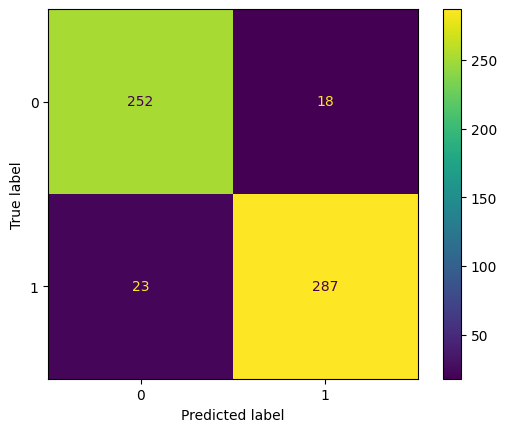

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm=confusion_matrix(y_test,model.predict(X_test))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [54]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,model.predict(X_test)))

0.9293103448275862
